In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedKFold, RandomizedSearchCV

# import graphviz
# from sklearn.tree import export_graphviz
import time

In [2]:
# na 값을 RandomForest에서 사용할 수 있게 하기 위해선 sklearn 1.4 이상 버젼이 필요(sklearn 1.4는 python 3.9 이상 필요)
sklearn.__version__
# !conda install scikit-learn=1.4 -y

'1.4.2'

In [3]:
matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
mpl.style.use("default")
mpl.rcParams.update({"figure.constrained_layout.use": True})

sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

In [4]:
# data_prep 에서 train/test split한 pivot table

train_scaled = pd.read_csv("./train_scaled.csv",index_col=0)
test_scaled = pd.read_csv("./test_scaled.csv",index_col=0)

train = pd.read_csv("./train_orig.csv",index_col=0)
test = pd.read_csv("./test_orig.csv",index_col=0)

In [5]:
city_info = ['date_label','geo_label_city']
features_list = []

target_list = ['Cancer | All Cancer Deaths']

# 결측치가 너무 많아/불균형해 제외된 column
avoid_list = ['Substance Use | Teen Smoking',
 'Diabetes and Obesity | Teen Obesity',
 'Substance Use | Teen Alcohol',
 'Physical Activity | Teen Computer Time',
 'Physical Activity | Teen Physical Activity',
 'Substance Use | Teen Marijuana',
 'Physical Activity | Teen TV Time',
 'Dietary Quality | Teen Soda',
 'Mental Health | Electronic Bullying',
 'Mental Health | School Bullying',
 'Mental Health | Teen Mental Distress',
 'Mental Health | Teen Suicidal Ideation',
 'Physical Activity | Teen Physical Inactivity',
 'Respiratory Disease | Teen Asthma',
 'School Violence | Fighting in School',
 'School Violence | Weapons in School',
 'Birth Control | Teen Birth Control',
 'Dietary Quality | Teen Breakfast',
 'Physical Activity | Teen Physical Education',
 'Respiratory Infection | COVID-19 Deaths',
 'Respiratory Infection | COVID-19 Vaccination, Adults',
 'Respiratory Infection | COVID-19 Vaccination, Seniors',
 'Births | Prenatal Care',
 'Crime Incidents | Violent Crime',
 'Lead Poisoning | Child Lead Levels 10+ mcg/dL',
 'Lead Poisoning | Child Lead Levels 5+ mcg/dL',
 'Lead Poisoning | Child Lead Testing']

# 일부 target 따라 너무 비슷한 값(ex) All Cancer를 예측할 때 세분화된 Cancer 사망자)
targetspecific_list = ['Cancer | Breast Cancer Deaths', 'Cancer | Colorectal Cancer Deaths','Cancer | Lung Cancer Deaths','Cancer | Prostate Cancer Deaths', 'Deaths | Deaths from All Causes']

# 두가지를 합쳐서 제외해야할 항목 결정
avoid_list += targetspecific_list

x_train = train_scaled.loc[:,~(train_scaled.columns.isin(avoid_list) | train_scaled.columns.isin(target_list) | train_scaled.columns.isin(city_info))]#features_list]
y_train = train[target_list]

x_test = test_scaled.loc[:,~(test_scaled.columns.isin(avoid_list) | test_scaled.columns.isin(target_list) | test_scaled.columns.isin(city_info))]#features_list]
y_test = test[target_list]

In [6]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 363
Data columns (total 89 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   geo_strata_poverty                                                        364 non-null    float64
 1   geo_strata_Population                                                     364 non-null    float64
 2   geo_strata_PopDensity                                                     364 non-null    float64
 3   geo_strata_Segregation                                                    364 non-null    float64
 4   Active Transportation | Riding Bike to Work                               364 non-null    float64
 5   Active Transportation | Walking to Work                                   364 non-null    float64
 6   Air Pollution | Hazardous Air Quality                                  

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

t:\miniconda3\envs\wassup_pr1\lib\site-packages\IPython\core\events.py:82: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  func(*args, **kwargs)
t:\miniconda3\envs\wassup_pr1\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


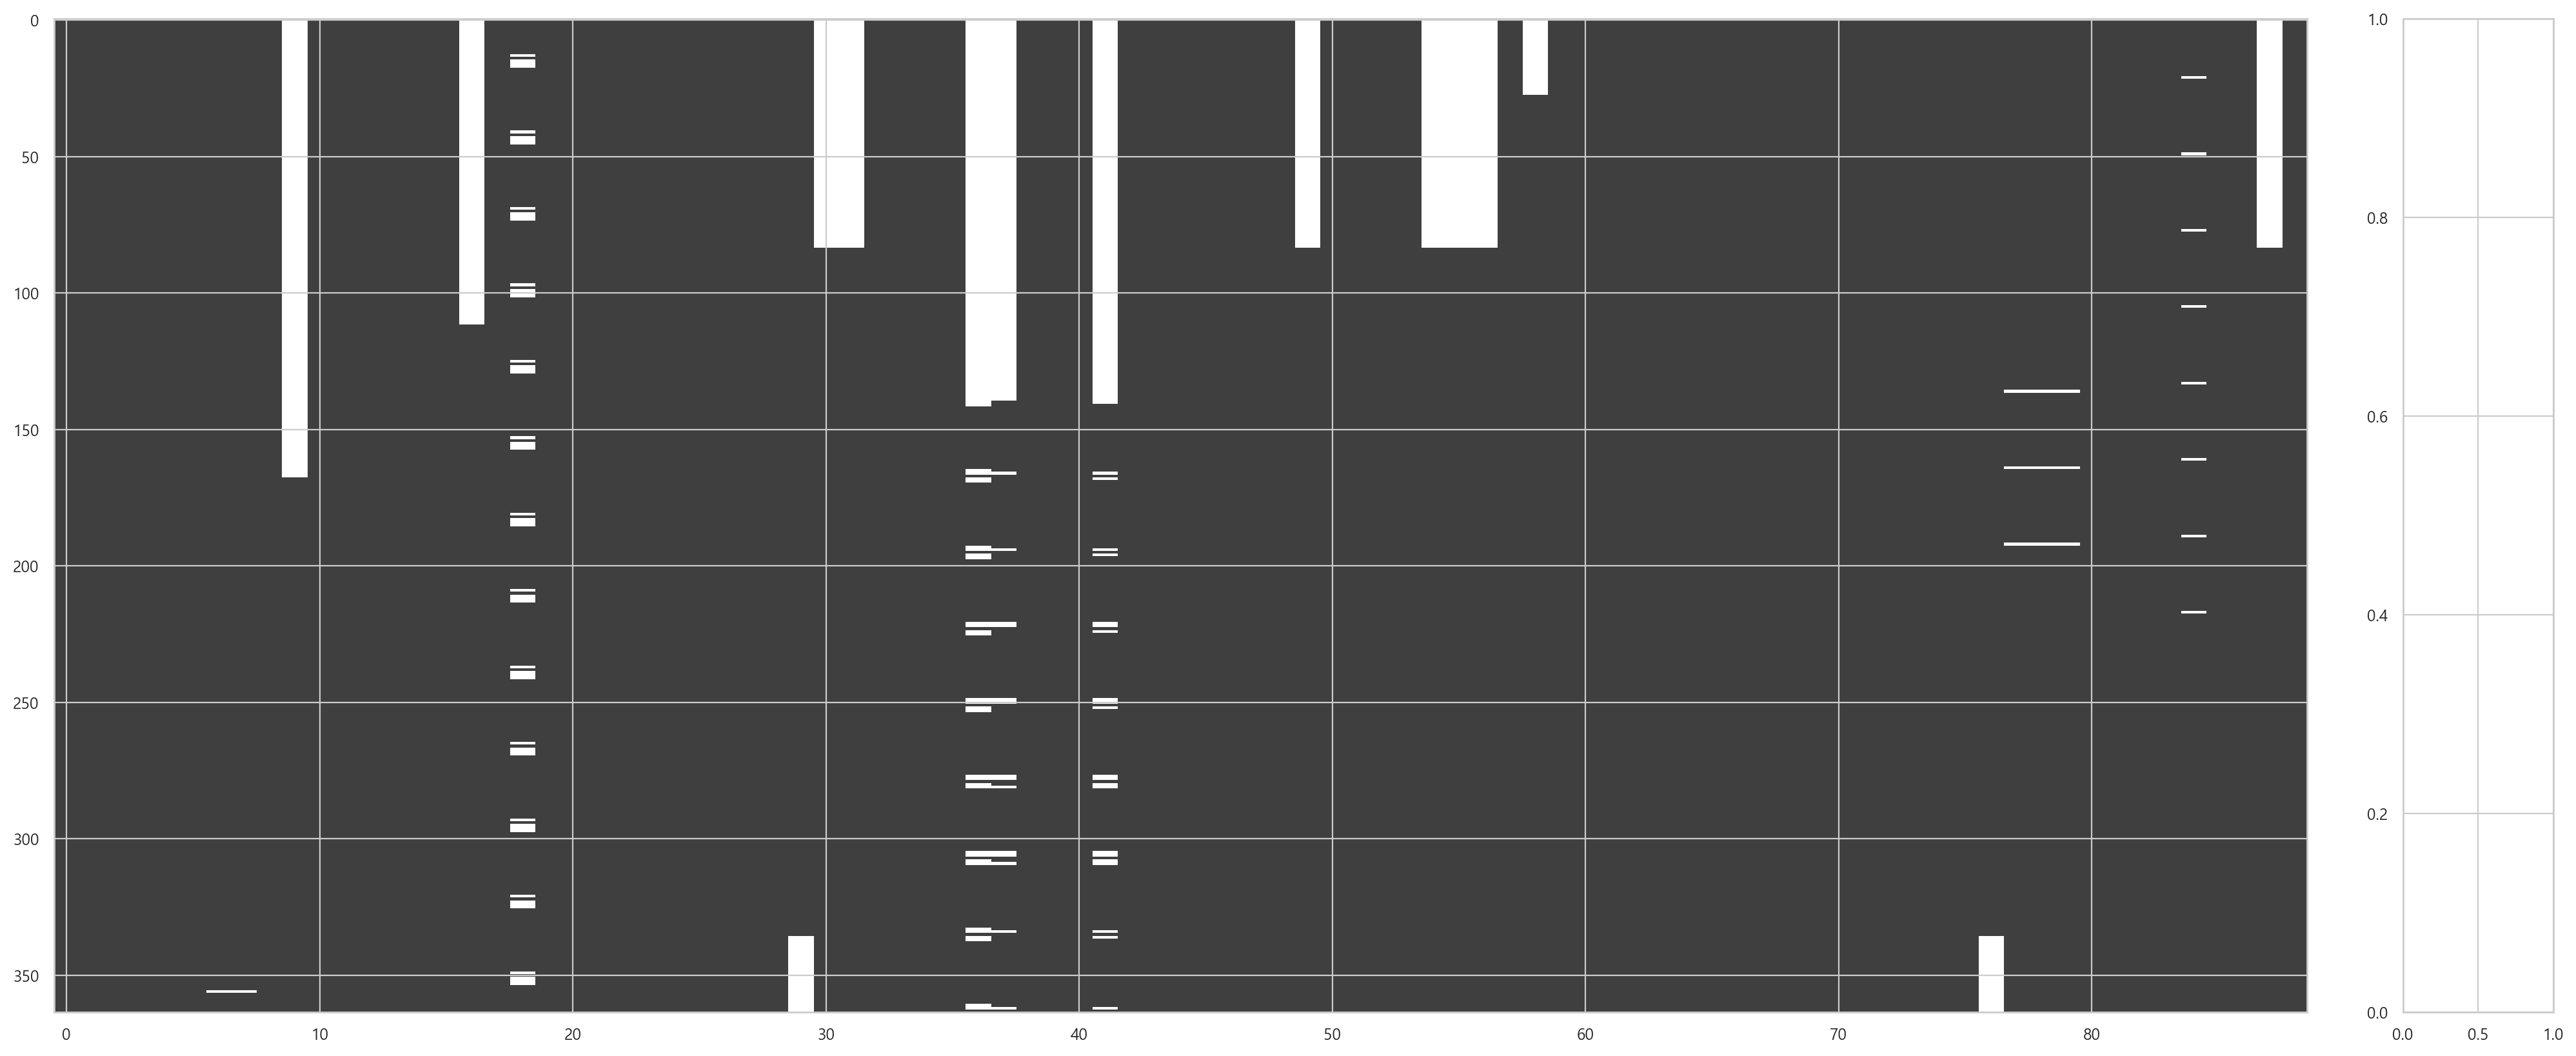

In [7]:
import missingno as msno
# msno.matrix(x_train)

# 결측치 채우려 할 경우 평균으로 간단하게 채워볼 수 있음
# x_train = x_train.apply(lambda x: x.fillna(x.mean()),axis=0)

msno.matrix(x_train)

In [ ]:
#Random Forest Regressor

cities_rfc = RandomForestRegressor(n_estimators=100,oob_score=True,random_state=42)
cities_rfc.fit(x_train,y_train.values.ravel())

cities_pred_train = cities_rfc.predict(x_train)
cities_pred_test = cities_rfc.predict(x_test)

print('train mse: ' ,metrics.mean_squared_error(cities_pred_train,y_train))
print('test mse: ' ,metrics.mean_squared_error(cities_pred_test,y_test))

train mse:  3.5225872043077575
test mse:  305.24525640454635


In [ ]:
# train의 y값 평균만 줬을때보단 얼마나 나을까?
print('baseline: ' ,metrics.mean_squared_error([y_train.mean()] * 91,y_test))

baseline:  637.7310246559484


<Axes: >

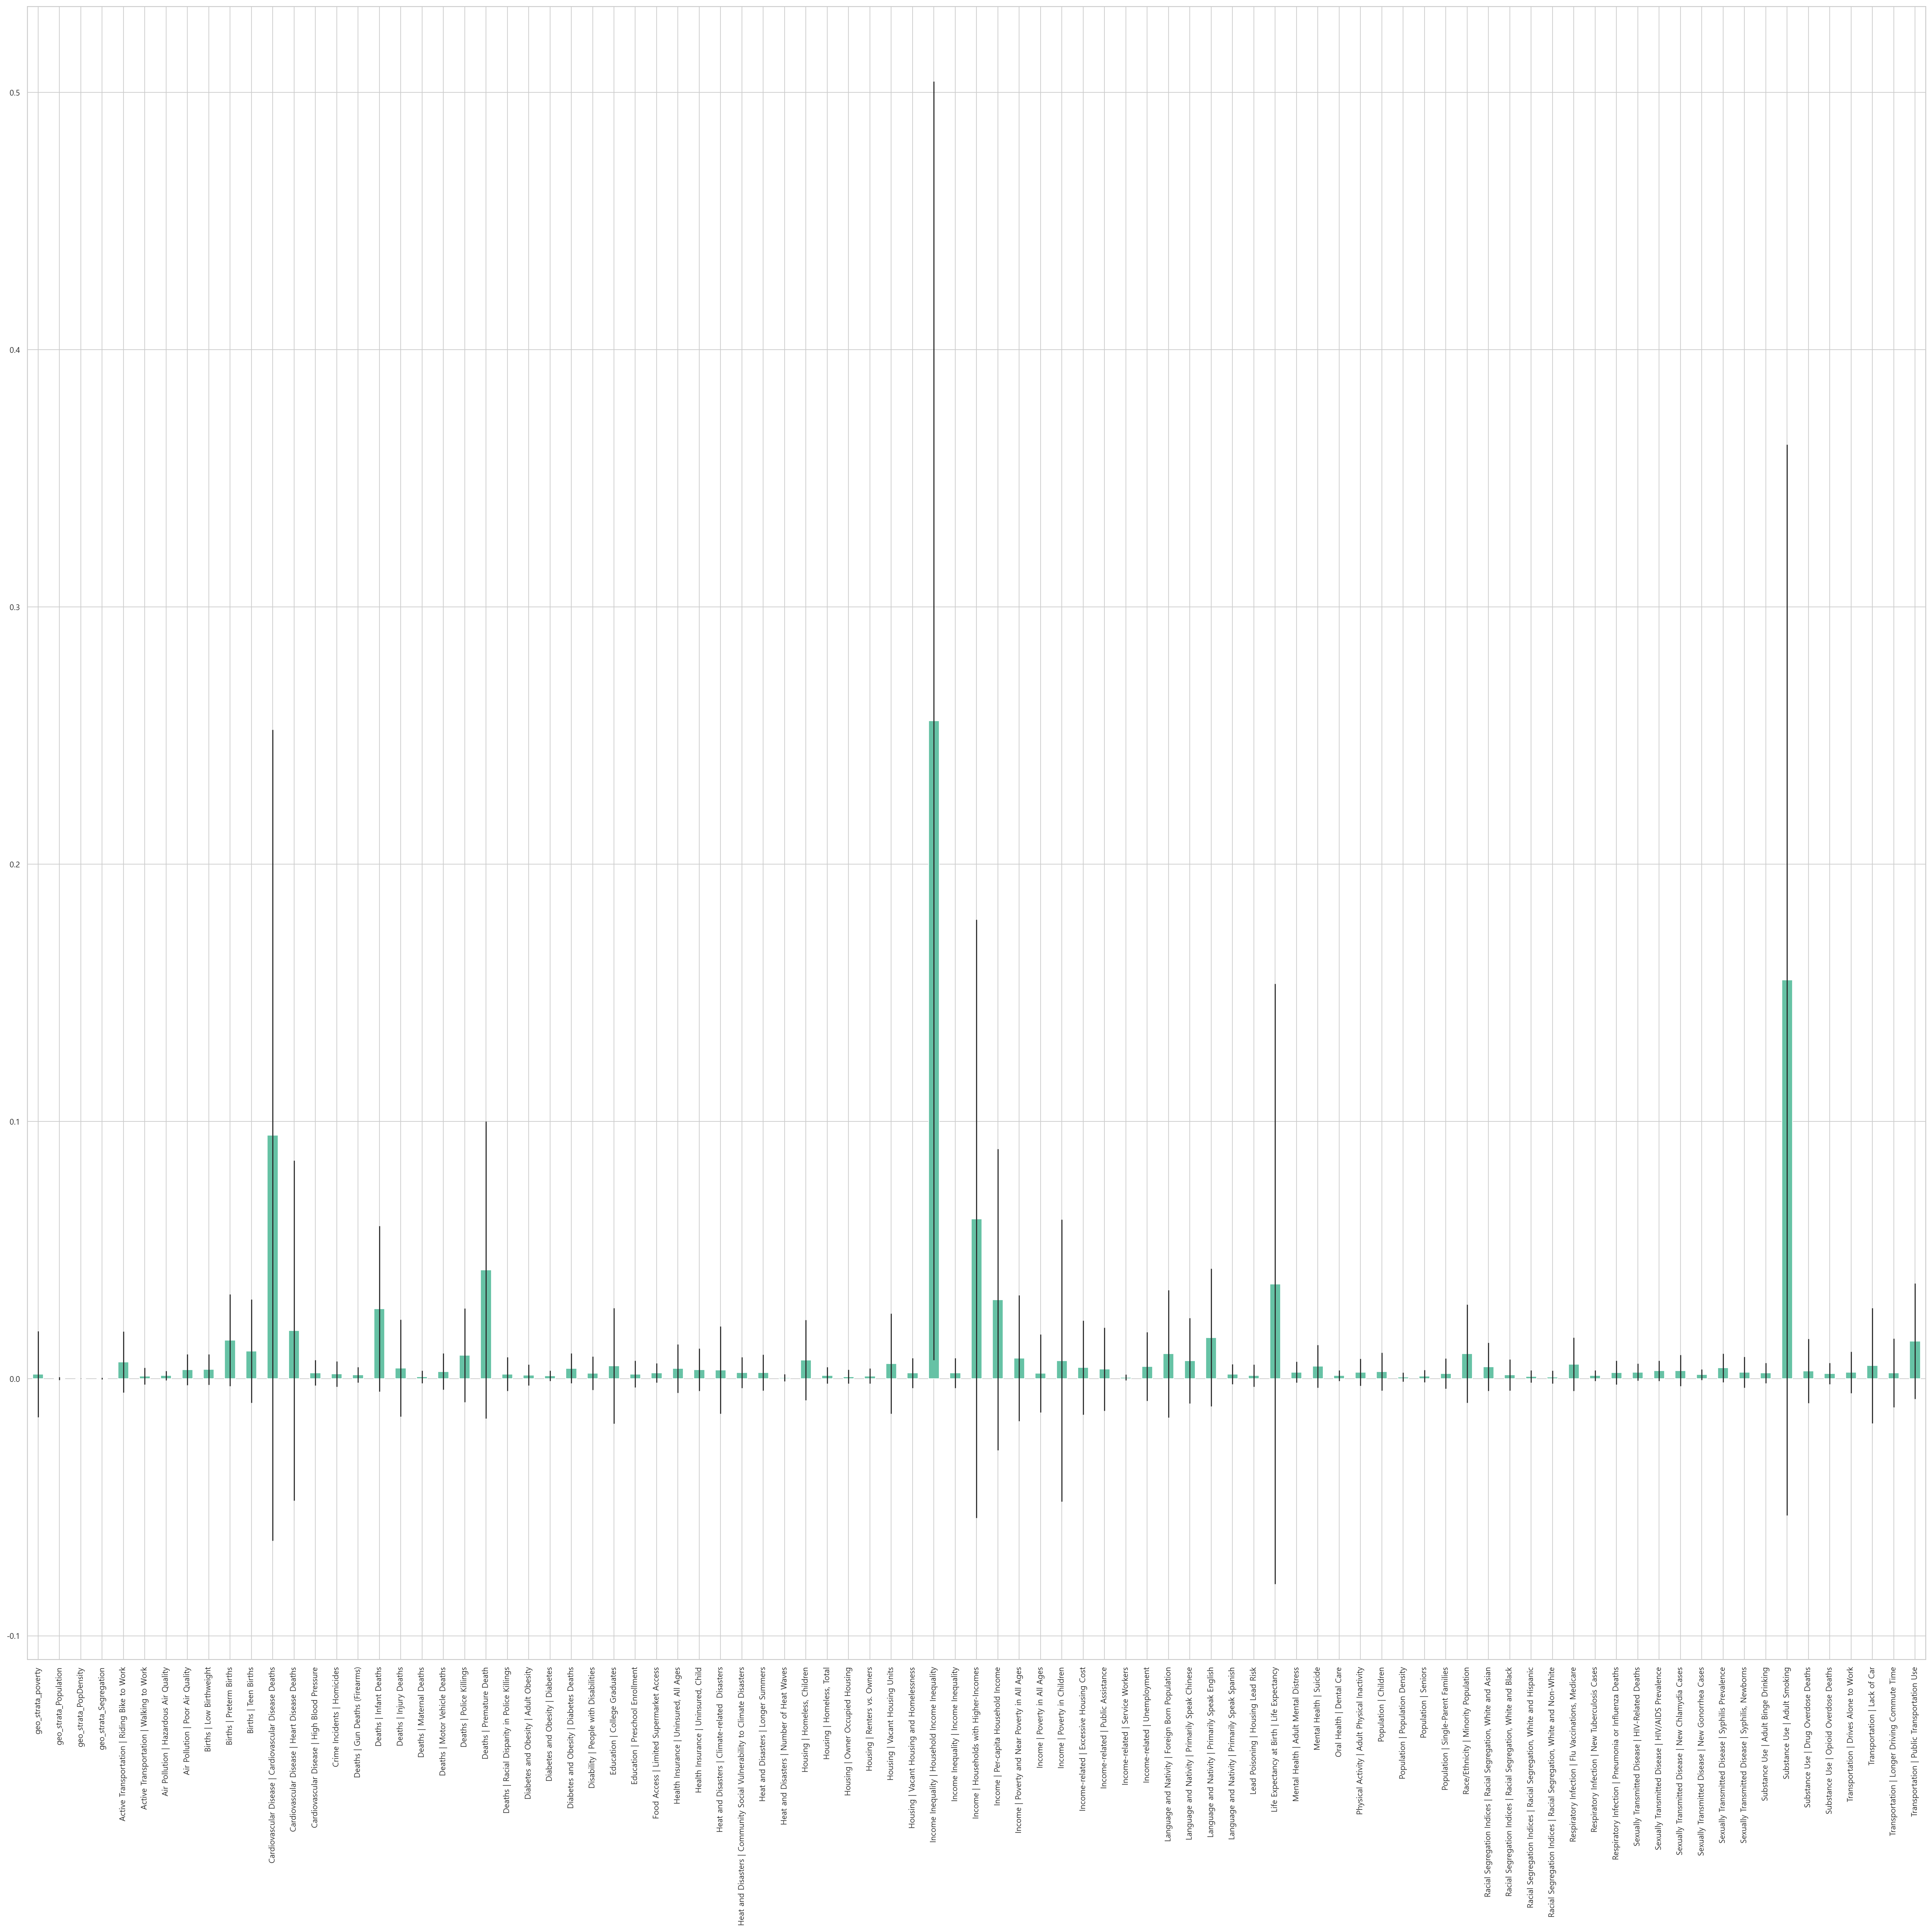

In [ ]:
#feature importance 계산
importance = cities_rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in cities_rfc.estimators_], axis=0)

forest_importance = pd.Series(importance, index=x_train.columns)

fig ,ax = plt.subplots(figsize=(30,30))
forest_importance.plot.bar(yerr=std,ax=ax)

In [ ]:
def threshold(p):
    return np.quantile(forest_importance,p).item()

In [ ]:
df_importance = forest_importance.to_frame()

#95%
display(df_importance[df_importance[0] > threshold(0.95)])
#90%
display(df_importance[df_importance[0] > threshold(0.9)])
#10%
display(df_importance[df_importance[0] < threshold(0.1)])
#5%
display(df_importance[df_importance[0] < threshold(0.05)])

,0
Cardiovascular Disease | Cardiovascular Disease Deaths,0.094592
Deaths | Premature Death,0.042212
Income Inequality | Household Income Inequality,0.255741
Income | Households with Higher-Incomes,0.062085
Substance Use | Adult Smoking,0.154940


,0
Cardiovascular Disease | Cardiovascular Disease Deaths,0.094592
Cardiovascular Disease | Heart Disease Deaths,0.018640
Deaths | Infant Deaths,0.027127
Deaths | Premature Death,0.042212
Income Inequality | Household Income Inequality,0.255741
Income | Households with Higher-Incomes,0.062085
Income | Per-capita Household Income,0.030695
Life Expectancy at Birth | Life Expectancy,0.036802
Substance Use | Adult Smoking,0.154940


,0
geo_strata_Population,0.000067
geo_strata_PopDensity,0.000015
geo_strata_Segregation,0.000049
Deaths | Maternal Deaths,0.000688
Heat and Disasters | Number of Heat Waves,0.000318
Housing | Owner Occupied Housing,0.000755
Income-related | Service Workers,0.000425
Population | Population Density,0.000539
"Racial Segregation Indices | Racial Segregation, White and Non-White",0.000603


,0
geo_strata_Population,0.000067
geo_strata_PopDensity,0.000015
geo_strata_Segregation,0.000049
Heat and Disasters | Number of Heat Waves,0.000318
Income-related | Service Workers,0.000425


In [ ]:
#지워볼만한 항목들
df_importance.index[df_importance[0] < threshold(0.1)]

Index(['geo_strata_Population', 'geo_strata_PopDensity',
       'geo_strata_Segregation', 'Deaths | Maternal Deaths',
       'Heat and Disasters | Number of Heat Waves',
       'Housing | Owner Occupied Housing', 'Income-related | Service Workers',
       'Population | Population Density',
       'Racial Segregation Indices | Racial Segregation, White and Non-White'],
      dtype='object')

In [ ]:
#위의 항목들 지우고 다시 하려면 여기 코드로 데이터 다시 정립
# avoid_list += df_importance.index[df_importance[0] < threshold(0.1)].to_list()

# x_train = train_scaled.loc[:,~(train_scaled.columns.isin(avoid_list) | train_scaled.columns.isin(target_list) | train_scaled.columns.isin(city_info))]#features_list]
# y_train = train[target_list]

# x_test = test_scaled.loc[:,~(test_scaled.columns.isin(avoid_list) | test_scaled.columns.isin(target_list) | test_scaled.columns.isin(city_info))]#features_list]
# y_test = test[target_list]

In [ ]:
#heuristic하게 고른 항목들로만 하면 얼마나 나을까?

heuristic_list = ["Cancer | Breast Cancer Deaths",
"Cancer | Prostate Cancer Deaths",
"Physical Activity | Adult Physical Inactivity",
"Diabetes and Obesity | Diabetes",
"Diabetes and Obesity | Teen Obesity",
"Diabetes and Obesity | Adult Obesity",
"Dietary Quality | Teen Soda",
"Population | Seniors",
"Health Insurance | Uninsured, All Ages",
"Births | Low Birthweight",
"Births | Prenatal Care",
"Births | Preterm Births",
"Births | Teen Births",
"Income | Poverty in All Ages"]

x_train = x_train = train_scaled.loc[:,train_scaled.columns.isin(heuristic_list) & ~(train_scaled.columns.isin(avoid_list))]#features_list]
y_train = train[target_list]

x_test = test_scaled.loc[:,test_scaled.columns.isin(heuristic_list) & ~(test_scaled.columns.isin(avoid_list))]#features_list]
y_test = test[target_list]

In [ ]:
# msno.matrix(x_train)
# x_train = x_train.apply(lambda x: x.fillna(x.mean()),axis=0)

In [ ]:
cities_rfc = RandomForestRegressor(n_estimators=100,oob_score=True,random_state=42)
cities_rfc.fit(x_train,y_train.values.ravel())

cities_pred_train = cities_rfc.predict(x_train)
cities_pred_test = cities_rfc.predict(x_test)

print('train mse: ' ,metrics.mean_squared_error(cities_pred_train,y_train))
print('test mse: ' ,metrics.mean_squared_error(cities_pred_test,y_test))
print('baseline mse: ' ,metrics.mean_squared_error([y_train.mean()] * 91,y_test))

print('train rmsle: ' ,metrics.root_mean_squared_log_error(cities_pred_train,y_train))
print('test rmsle: ' ,metrics.root_mean_squared_log_error(cities_pred_test,y_test))
print('baseline rmsle: ' ,metrics.root_mean_squared_log_error([y_train.mean()] * 91,y_test))

train mse:  8.308217032767253
test mse:  312.8756125990334
baseline mse:  637.7310246559484
train rmsle:  0.01772984881591639
test rmsle:  0.1072528127479103
baseline rmsle:  0.15473853716169564


<Axes: >

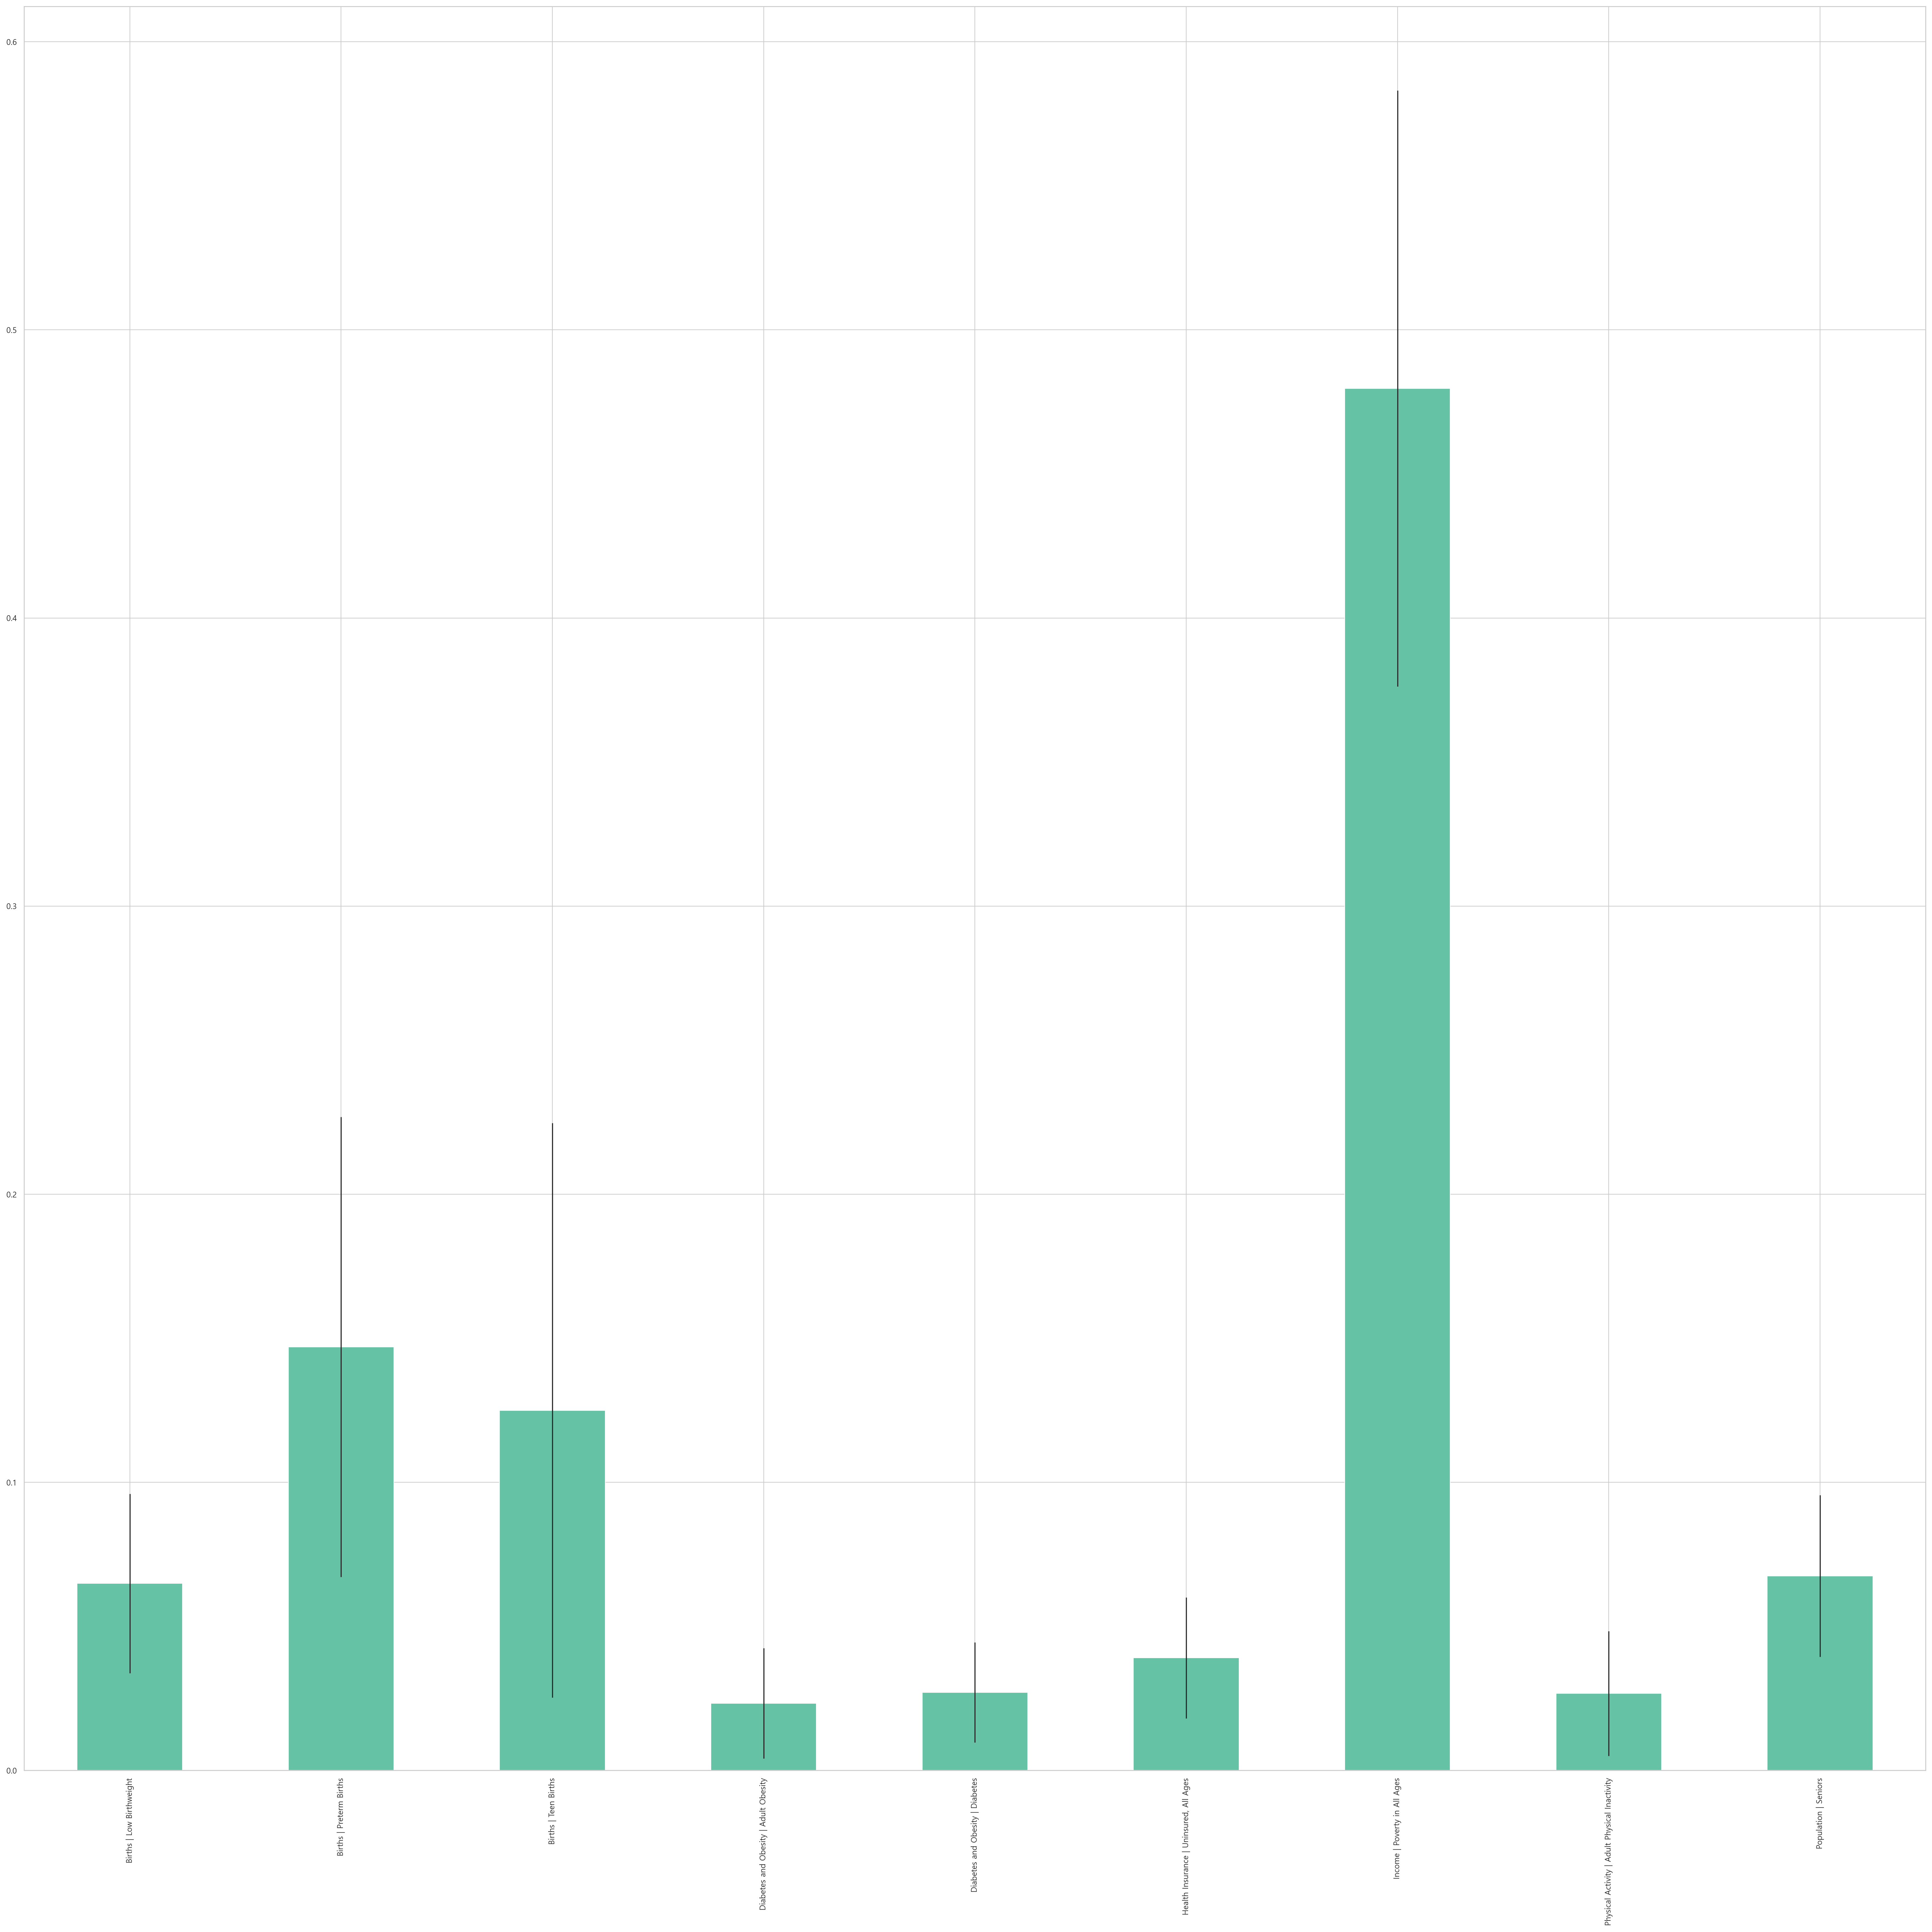

In [ ]:
importance = cities_rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in cities_rfc.estimators_], axis=0)

forest_importance = pd.Series(importance, index=x_train.columns)

fig ,ax = plt.subplots(figsize=(30,30))
forest_importance.plot.bar(yerr=std,ax=ax)

In [ ]:
df_importance = forest_importance.to_frame()

#95%
display(df_importance[df_importance[0] > threshold(0.95)])
#90%
display(df_importance[df_importance[0] > threshold(0.9)])
#10%
display(df_importance[df_importance[0] < threshold(0.1)])
#5%
display(df_importance[df_importance[0] < threshold(0.05)])

,0
Income | Poverty in All Ages,0.479717


,0
Income | Poverty in All Ages,0.479717


,0
Diabetes and Obesity | Adult Obesity,0.023255


,0
Diabetes and Obesity | Adult Obesity,0.023255
